In [56]:
import json
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import copy
import numpy as np

In [19]:
with open('./datasets/annotations/instances_val2017.json', 'r') as f:
  coco_annot = json.load(f)

In [53]:
coco_annot.keys()

print(coco_annot['info'])
print(coco_annot['licenses'])
[x for x in coco_annot['images'] if x['id']==289343]
print([x for x in coco_annot['categories'] if x['id']==64])
print(len(coco_annot['annotations']))
print(coco_annot['annotations'][0])

{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http://www.usa.gov/copyright.shtml', 'id': 8, 'n

In [73]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [32]:
image_names = set(os.listdir('./datasets/val2017'))

In [36]:
img_info = [x for x in coco_annot['images'] if x['file_name'] in tgt_image_names]
img_ids = set([x['id'] for x in tgt_img_info])
annot = [x for x in coco_annot['annotations'] if x['image_id'] in tgt_img_ids]

In [37]:
print(len(img_info), len(annot))

5000 36781


In [39]:
img_info[0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [38]:
annot[0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [80]:
def calculate_area(coordinates):
    num_points = len(coordinates)
    if num_points < 3:
        return 0

    area = 0
    for i in range(num_points - 1):
        x_i, y_i = coordinates[i]
        x_iplus1, y_iplus1 = coordinates[i + 1]
        area += (x_i * y_iplus1) - (x_iplus1 * y_i)

    x_n, y_n = coordinates[-1]
    x_0, y_0 = coordinates[0]
    area += (x_n * y_0) - (x_0 * y_n)

    area = abs(area / 2)
    return area

Orig area is: 531.8071000000001 and calculated area is: 531.8070999999945
Orig bbox is: [236.98, 142.51, 24.7, 69.5] and calculated bbox is: (236.98, 142.51, 24.700000000000017, 69.5)
Orig area is: 13244.657700000002 and calculated area is: 13244.657700000003
Orig bbox is: [7.03, 167.76, 149.32, 94.87] and calculated bbox is: (7.03, 167.76, 149.32, 94.87)
Orig area is: 5833.117949999999 and calculated area is: 5833.117949999985
Orig bbox is: [557.21, 209.19, 81.35, 78.73] and calculated bbox is: (557.21, 209.19, 81.34999999999991, 78.73000000000002)
Orig area is: 2245.34355 and calculated area is: 2245.3435499999905
Orig bbox is: [358.98, 218.05, 56.0, 102.83] and calculated bbox is: (358.98, 218.05, 56.0, 102.82999999999998)
Orig area is: 1833.7840000000017 and calculated area is: 1833.7840000000142
Orig bbox is: [290.69, 218.0, 61.83, 98.48] and calculated bbox is: (290.69, 218.0, 61.829999999999984, 98.48000000000002)
Orig area is: 1289.3734500000014 and calculated area is: 1289.373

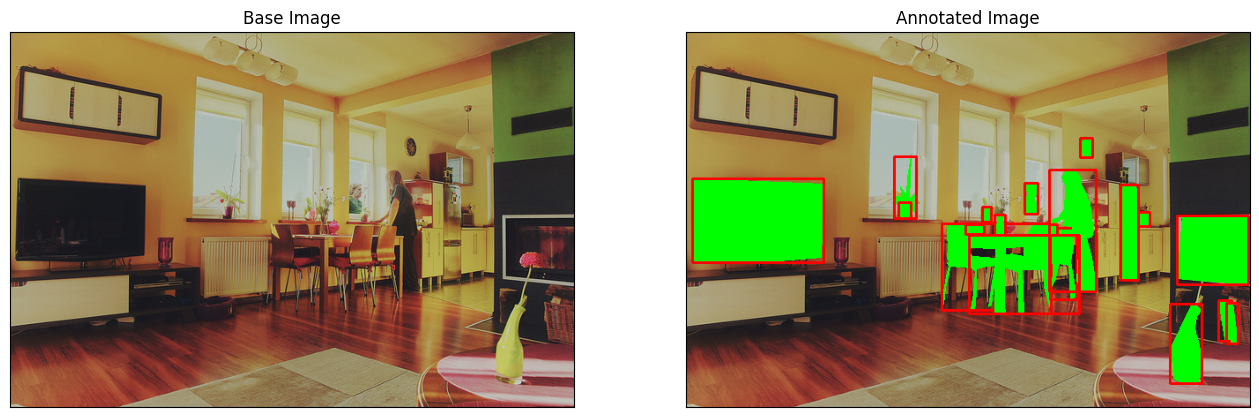

In [86]:
tgt_image_name = '000000000139.jpg'
tgt_img_id = [x['id'] for x in img_info if x['file_name']==tgt_image_name][0]
tgt_annots = [x for x in annot if x['image_id']==tgt_img_id]
tgt_annot = tgt_annots[0]
base_image = cv2.imread(f'./datasets/val2017/{tgt_image_name}')
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
# print(base_image.shape)
annotated_image = copy.deepcopy(base_image)
# print(tgt_annot)
imgs_dict = dict()
imgs_dict['base_image'] = base_image

for tgt_annot in tgt_annots:
  orig_segmentations = [[x, y] for x, y in zip(tgt_annot['segmentation'][0][::2], tgt_annot['segmentation'][0][1::2])]
  segmentations = [[int(x), int(y)] for x, y in zip(tgt_annot['segmentation'][0][::2], tgt_annot['segmentation'][0][1::2])]
  # coords = np.array(segmentations)
#   print(coords)
  cv2.fillPoly(annotated_image, pts=[np.array(segmentations)], color=(0,255,0))
  top_left = (int(tgt_annot['bbox'][0]), int(tgt_annot['bbox'][1]))
  print(f"Orig area is: {tgt_annot['area']} and calculated area is: {calculate_area([[x, y] for x, y in zip(tgt_annot['segmentation'][0][::2], tgt_annot['segmentation'][0][1::2])])}")
  min_x = min(orig_segmentations, key=lambda x: x[0])[0]
  min_y = min(orig_segmentations, key=lambda x: x[1])[1]
  max_x = max(orig_segmentations, key=lambda x: x[0])[0]
  max_y = max(orig_segmentations, key=lambda x: x[1])[1]
  print(f"Orig bbox is: {tgt_annot['bbox']} and calculated bbox is: {(min_x, min_y, max_x-min_x, max_y-min_y)}")
  bottom_right = (int(tgt_annot['bbox'][0]+tgt_annot['bbox'][2]), int(tgt_annot['bbox'][1]+tgt_annot['bbox'][3]))
  annotated_image = cv2.rectangle(annotated_image, top_left, bottom_right, (255,0,0), 2)
imgs_dict['annotated_image'] = annotated_image
visualize(**imgs_dict)

# plt.imshow(annotated_image)

# tile_idx = 10
# img_id = tiles_dicts[tile_idx]['id']
# base_image = cv2.imread(f'{base_path}/train/{img_id}.tif')
# blood_vessel_masked_image = np.zeros((512, 512))
# glom_masked_image = np.zeros((512, 512))
# unsure_masked_image = np.zeros((512, 512))
# for annot_idx in range(0, len(tiles_dicts[tile_idx]['annotations'])):
#     coords = np.array(tiles_dicts[tile_idx]['annotations'][annot_idx]['coordinates'][0])
#     mask_type = tiles_dicts[tile_idx]['annotations'][annot_idx]['type']
#     if mask_type == 'blood_vessel':
#         cv2.fillPoly(blood_vessel_masked_image, pts=[coords], color=1)